In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.ticker as ticker

# **Load Dataset by pandas**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/reviews.csv')


df.head(10)

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN
5,2022-07-09 13:20:20,The player controls sometimes disappear for no...,3,7,NaN
6,2022-07-09 13:19:21,I love the selection and the lyrics are provid...,5,0,NaN
7,2022-07-09 13:17:22,Still extremely slow when changing storage to ...,3,16,NaN
8,2022-07-09 13:16:49,It's a great app and the best mp3 music app I ...,5,0,NaN
9,2022-07-09 13:11:32,"I'm deleting this app, for the following reaso...",1,318,NaN


In [ ]:
print(df.columns)

Index(['Time_submitted', 'Review', 'Rating', 'Total_thumbsup', 'Reply'], dtype='object')


In [ ]:
print("Data Types:")
print(df.dtypes)

Data Types:
Time_submitted    object
Review            object
Rating             int64
Total_thumbsup     int64
Reply             object
dtype: object


In [ ]:
# Correcting the wrong datatype (Turning object time column into datetime format)
df.Time_submitted = pd.to_datetime(df.Time_submitted)

In [ ]:
print(df.isna().sum())

Time_submitted        0
Review                0
Rating                0
Total_thumbsup        0
Reply             61378
dtype: int64


In [ ]:
# Create a new column based on length of the reviews
df['length_of_text'] = [len(i.split(' ')) for i in df['Review']]

In [ ]:
# Let's look at the summary of the dataset
print(df.head())

       Time_submitted                                             Review  \
0 2022-07-09 15:00:00  Great music service, the audio is high quality...   
1 2022-07-09 14:21:22  Please ignore previous negative rating. This a...   
2 2022-07-09 13:27:32  This pop-up "Get the best Spotify experience o...   
3 2022-07-09 13:26:45    Really buggy and terrible to use as of recently   
4 2022-07-09 13:20:49  Dear Spotify why do I get songs that I didn't ...   

   Rating  Total_thumbsup Reply  length_of_text  
0       5               2   NaN              21  
1       5               1   NaN              15  
2       4               0   NaN              19  
3       1               1   NaN               9  
4       1               1   NaN              21  


In [ ]:
# Let's look at the summary of the dataset.
# Ratings are integers in range of 1 and 5.
# Maximum text length has 699 words in it, and minimum is 2 words.
# Reviews with maximum thumbs up has 8195 thumbs up. And most of the reviews have no thumbs up.
print(df.describe())

                      Time_submitted        Rating  Total_thumbsup  \
count                          61594  61594.000000    61594.000000   
mean   2022-04-20 13:19:59.792544768      3.155989        7.649381   
min              2022-01-01 00:19:09      1.000000        0.000000   
25%    2022-03-08 20:15:09.249999872      1.000000        0.000000   
50%       2022-04-22 02:19:45.500000      3.000000        0.000000   
75%    2022-06-03 08:51:11.249999872      5.000000        1.000000   
max              2022-07-09 15:00:00      5.000000     8195.000000   
std                              NaN      1.673285       89.323143   

       length_of_text  
count    61594.000000  
mean        30.886418  
min          2.000000  
25%         14.000000  
50%         25.000000  
75%         42.000000  
max        699.000000  
std         22.743734  


Data Visualizations: Part I

In [ ]:
import plotly.express as px

# Distribution of the Length of the Reviews (Length of Text greater than 120 is neglected)
fig = px.histogram(df[df['length_of_text'] <= 120].length_of_text, marginal='box',
                   labels={"value": "Length of the Reviews"})
fig.update_traces(marker=dict(line=dict(color='#000000', width=0.25)))
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)'})
fig.update_layout(title_text='Distribution of the Length of the Reviews',
                  title_x=0.5, title_font=dict(size=18), showlegend=False)
fig.show()


In [ ]:
# Text length mean, std, number of ratings and total words for each Ratings
print(df.groupby('Rating').length_of_text.agg({'mean', 'std', 'count', 'sum'}))

        count        std       mean     sum
Rating                                     
1       17653  23.886326  37.034158  653764
2        7118  23.854936  39.540742  281451
3        6886  23.394261  36.952512  254455
4        7842  21.872813  30.692808  240693
5       22095  17.495324  21.364788  472055


In [ ]:

# Distribution of the Length of the Reviews by their Ratings (Length of Text greater than 120 is neglected)
fig = px.histogram(df[df['length_of_text'] <= 120], x='length_of_text', color='Rating',
                   marginal='box', labels={"value": "Length of the Reviews"})
fig.update_traces(marker=dict(line=dict(color='#000000', width=0.25)))
fig.update_layout(title_text='Distribution of the Length of the Reviews by their Ratings',
                  title_x=0.5, title_font=dict(size=18))
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)'})
fig.show()

In [ ]:
# Frequency of the Ratings
fig = px.histogram(df, x='Rating', color='Rating')
fig.update_traces(marker=dict(line=dict(color='#000000', width=0.5)))
fig.update_layout(title_text='Frequency of the Ratings',
                  title_x=0.5, title_font=dict(size=18))
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)'})
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
import plotly.graph_objects as go

# Number of Reviews Over Time
dailyNumOfReviews = df.resample('d', on='Time_submitted').size().sort_index()

fig = go.Figure()
fig.add_trace(go.Scatter(y=dailyNumOfReviews, x=dailyNumOfReviews.index,
                         mode='markers+text+lines', name=f"Number of Reviews", line=dict(width=3)))

fig.update_layout(
    yaxis=dict(title_text="Number of Reviews", titlefont=dict(size=15)),
    xaxis=dict(title_text="Date", titlefont=dict(size=15)),
    title={'text': f"Number of Reviews Over Time",
           'x': 0.5})
fig.update_traces(marker=dict(line=dict(color='#000000', width=0.75)))
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)'})
fig.show()



In [ ]:
# Number of Reviews Over Time for each Rating
dailyNumOfReviewsEachRatings = df.groupby('Rating').resample('d', on='Time_submitted').size().unstack().T

fig = go.Figure()
for col in dailyNumOfReviewsEachRatings.columns:
    fig.add_trace(go.Scatter(y=dailyNumOfReviewsEachRatings[col],
                             x=dailyNumOfReviewsEachRatings.index,
                             mode='lines',
                             name=f"Number of Reviews for Rating {col}",
                             line=dict(width=1.5)))

fig.update_layout(
    yaxis=dict(title_text="Number of Reviews", titlefont=dict(size=15)),
    xaxis=dict(title_text="Date", titlefont=dict(size=15)),
    title={'text': f"Number of Reviews Over Time for each Rating",
           'x': 0.5})
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)'})
fig.show()

In [ ]:
# Rolling Mean of the Rating over Time (7 days window)
RatingDaily = df.sort_values('Time_submitted').resample('d', on='Time_submitted').Rating.mean().to_frame()
rollingRating = RatingDaily.rolling(7, min_periods=2).Rating.mean()

fig = go.Figure()
fig.add_trace(go.Scatter(y=rollingRating, x=rollingRating.index,
                         mode='markers+lines', name=f"Rolling Mean of the Ratings", line=dict(width=3)))

fig.update_layout(
    yaxis=dict(title_text="Average Rating", titlefont=dict(size=15)),
    xaxis=dict(title_text="Date", titlefont=dict(size=15)),
    title={'text': f"Rolling Mean of the Rating over Time (7 days window)",
           'x': 0.5})
fig.update_traces(marker=dict(line=dict(color='#000000', width=0.75)))
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)'})
fig.show()

In [ ]:
import plotly.express as px

# Top used 100 Words before Text Cleaning
FreqOfWords = df['Review'].str.split(expand=True).stack().value_counts()
FreqOfWords_top100 = FreqOfWords[:100].reset_index()
FreqOfWords_top100.columns = ['Word', 'Count']

fig = px.treemap(FreqOfWords_top100, path=['Word'], values='Count')
fig.update_layout(title_text='Top used 100 Words before Text Cleaning',
                  title_x=0.5, title_font=dict(size=18))
fig.show()


Text Cleaning

In [ ]:
# Lower case of the Reviews.
df['Review'] = df['Review'].str.lower()

In [ ]:
!pip install contractions


In [ ]:
import contractions

# Fix contractions such as doesn't to does not, he's to he is, etc.
def fixContractions(inputs):
    return contractions.fix(inputs)

df['ReviewContractions'] = df['Review'].apply(fixContractions)

# Some examples
print(df['Review'][4])
print(df['ReviewContractions'][4])


dear spotify why do i get songs that i didn't put on my playlist??? and why do we have shuffle play?
dear spotify why do i get songs that i did not put on my playlist??? and why do we have shuffle play?


In [ ]:
# Remove Numbers
df.ReviewContractions = df.ReviewContractions.replace(r'\d+', '', regex=True)

In [ ]:
!pip install nltk


In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK punkt tokenizer
nltk.download('punkt')

# Tokenization
def tokenization(inputs):
    return word_tokenize(inputs)

df['ReviewTokenized'] = df['ReviewContractions'].apply(tokenization)
print(df.ReviewTokenized[5])
print(df.ReviewTokenized[600])



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['the', 'player', 'controls', 'sometimes', 'disappear', 'for', 'no', 'reason', '.', 'app', 'restart', 'forgets', 'what', 'i', 'was', 'playing', 'but', 'fixes', 'the', 'issue', '.']
['spotify', 'is', 'the', 'best', 'app', 'i', 'ever', 'used', 'i', 'felt', 'that', 'spotify', 'is', 'connect', 'with', 'my', 'soul', 'and', 'heart', 'what', 'ever', 'my', 'mood', 'is', 'spotify', 'play', 'that', 'type', 'of', 'songs', 'for', 'me😍', 'i', 'love', 'spotify❤']


In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Stopwords Removal
stop_words = set(stopwords.words('english'))
stop_words.remove('not')  # 'not' is usually meaningful, so it's removed from stopwords

def stopwordsRemove(inputs):
    return [item for item in inputs if item not in stop_words]

df['ReviewStop'] = df['ReviewTokenized'].apply(stopwordsRemove)
print(df.ReviewStop[5])
print(df.ReviewStop[600])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['player', 'controls', 'sometimes', 'disappear', 'reason', '.', 'app', 'restart', 'forgets', 'playing', 'fixes', 'issue', '.']
['spotify', 'best', 'app', 'ever', 'used', 'felt', 'spotify', 'connect', 'soul', 'heart', 'ever', 'mood', 'spotify', 'play', 'type', 'songs', 'me😍', 'love', 'spotify❤']


In [ ]:
import re

# Remove punctuations from tokenized text rows
def removePunctuation(inputs):
    p = re.compile(r'[^\w\s]+')
    return p.sub('', inputs)

df['ReviewStop'] = df['ReviewStop'].apply(lambda x: list(map(removePunctuation, x)))
print(df.ReviewStop[5])
print(df.ReviewStop[600])


['player', 'controls', 'sometimes', 'disappear', 'reason', '', 'app', 'restart', 'forgets', 'playing', 'fixes', 'issue', '']
['spotify', 'best', 'app', 'ever', 'used', 'felt', 'spotify', 'connect', 'soul', 'heart', 'ever', 'mood', 'spotify', 'play', 'type', 'songs', 'me', 'love', 'spotify']


In [ ]:
import re

# Removing Emojis from the text
def removeEmoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

df['ReviewStop'] = df['ReviewStop'].apply(lambda x: list(map(removeEmoji, x)))
print(df.ReviewStop[5])
print(df.ReviewStop[600])


['player', 'controls', 'sometimes', 'disappear', 'reason', '', 'app', 'restart', 'forgets', 'playing', 'fixes', 'issue', '']
['spotify', 'best', 'app', 'ever', 'used', 'felt', 'spotify', 'connect', 'soul', 'heart', 'ever', 'mood', 'spotify', 'play', 'type', 'songs', 'me', 'love', 'spotify']


In [ ]:
import re

# Remove non-latin words from the sentences
def removeNonLatin(string):
    return re.sub(r'[^\x00-\x7f]', '', string)

# Remove underscores
def removeUnderscores(string):
    return string.replace('_', '')

df['ReviewStop'] = df['ReviewStop'].apply(lambda x: list(map(removeNonLatin, x)))
df['ReviewStop'] = df['ReviewStop'].apply(lambda x: list(map(removeUnderscores, x)))


In [ ]:
# Removing Words less than length 2. Because I replaced emojis and punctuations with ''.
# There are still in the text as a blank element of the sentence. After this step, they will be removed.
def removeLessThan_2(inputs):
    return [j for j in inputs if len(j) > 2]


df['ReviewStop'] = df['ReviewStop'].apply(removeLessThan_2)

In [ ]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatization
def lemmatization(inputs):
    return [lemmatizer.lemmatize(word=x, pos='v') for x in inputs]

df['ReviewLemmatized'] = df['ReviewStop'].apply(lemmatization)
print(df.ReviewLemmatized[5])
print(df.ReviewLemmatized[600])


['player', 'control', 'sometimes', 'disappear', 'reason', 'app', 'restart', 'forget', 'play', 'fix', 'issue']
['spotify', 'best', 'app', 'ever', 'use', 'felt', 'spotify', 'connect', 'soul', 'heart', 'ever', 'mood', 'spotify', 'play', 'type', 'songs', 'love', 'spotify']


In [ ]:
# Joining Tokens into Sentences
df['ReviewFinal'] = df['ReviewLemmatized'].str.join(' ')
print(df.ReviewFinal[5])
print(df.ReviewFinal[600])

player control sometimes disappear reason app restart forget play fix issue
spotify best app ever use felt spotify connect soul heart ever mood spotify play type songs love spotify


In [ ]:
print(FreqOfWords_top100)

     Word  Count
0      to  65159
1     the  64751
2       I  59824
3     and  45966
4      it  34108
..    ...    ...
95    new   3162
96     do   3135
97   best   3026
98     am   2956
99  still   2937

[100 rows x 2 columns]


In [ ]:
import pandas as pd
import plotly.express as px


# Adjust column names
df_top100.columns = ['word', 'count']

# Plot the treemap
fig = px.treemap(df_top100, path=['word'], values='count')
fig.update_layout(title_text='Top used 100 Words after Text Cleaning',
                  title_x=0.5, title_font=dict(size=18))
fig.show()



In [ ]:
print(df.columns)

Index(['Time_submitted', 'Review', 'Rating', 'Total_thumbsup', 'Reply',
       'length_of_text', 'ReviewContractions', 'ReviewTokenized', 'ReviewStop',
       'ReviewLemmatized', 'ReviewFinal'],
      dtype='object')


In [ ]:
# Top used Words at Drop and Peak Dates of the Rating Rolling Average, what happened between these time periods?
# As discussed previously, we assumed that there was some major bugs or something went wrong for these time periods.
# (12 April - 17 April) = pt1, (27 April - 7 May) = pt2, and (8 March - 14 March) = pt3
# Top used Words at Drop and Peak Dates of the Rating Rolling Average, what happened between these time periods?
# As discussed previously, we assumed that there were some major bugs or something went wrong for these time periods.
# (12 April - 17 April) = pt1, (27 April - 7 May) = pt2, and (8 March - 14 March) = pt3

pt1_data = df[(df['Time_submitted'] >= '2022-04-12 00:00:00') & (df['Time_submitted'] <= '2022-04-17 23:59:59')]
pt2_data = df[(df['Time_submitted'] >= '2022-04-27 00:00:00') & (df['Time_submitted'] <= '2022-05-07 23:59:59')]
pt3_data = df[(df['Time_submitted'] >= '2022-03-08 00:00:00') & (df['Time_submitted'] <= '2022-03-14 23:59:59')]

# Create ngrams
def get_ngrams(text_input, n):  # https://stackoverflow.com/a/32307986
    n_grams = ngrams(word_tokenize(text_input), n)
    return [' '.join(grams) for grams in n_grams]



In [ ]:
import plotly.express as px

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

fig = px.imshow(numeric_df.corr().round(2), text_auto=True, aspect="auto",
                color_continuous_scale='Reds')
fig.update_layout(
    title={'text': f"Correlation Graph of the Dataset",
           'x': 0.5})
fig.update_layout(coloraxis_showscale=False)
fig.show()


In [ ]:
print(df.columns)

Index(['Time_submitted', 'Review', 'Rating', 'Total_thumbsup', 'Reply',
       'length_of_text', 'ReviewContractions', 'ReviewTokenized', 'ReviewStop',
       'ReviewLemmatized', 'ReviewFinal'],
      dtype='object')


In [ ]:
print(df.columns)

Index(['Time_submitted', 'Review', 'Rating', 'Total_thumbsup', 'Reply',
       'length_of_text', 'ReviewContractions', 'ReviewTokenized', 'ReviewStop',
       'ReviewLemmatized', 'ReviewFinal'],
      dtype='object')


In [ ]:
print(df.columns)

Index(['Time_submitted', 'Review', 'Rating', 'Total_thumbsup', 'Reply',
       'length_of_text', 'ReviewContractions', 'ReviewTokenized', 'ReviewStop',
       'ReviewLemmatized', 'ReviewFinal'],
      dtype='object')


In [ ]:
df ['Rating'].value_counts()

Rating
5    22095
1    17653
4     7842
2     7118
3     6886
Name: count, dtype: int64

# **Vectorization by Count Vectorizer, Train-Test Split**

In [ ]:

# vectorizer = CountVectorizer( stop_words = 'english' )
vectorizer = CountVectorizer()

x = df['Review']
y = df['Rating']


#Test-train split
x_train, x_test, y_train, y_test = train_test_split (x, y, random_state = 42, test_size = 0.20, shuffle = True, stratify = y)

print ("\nTraining Data size: ", x_train.shape)
print ("Testing Data size: ", x_test.shape)



Training Data size:  (49275,)
Testing Data size:  (12319,)


# **For 5 labels classification of sentiments**

## **MultinimialNB classifier 5 label: fitting and prediction**

In [ ]:

cv_train_transformed = vectorizer.fit_transform(x_train)
cv_test_transformed = vectorizer.transform(x_test)


#MultinomialNB classifier fitting
classifier = MultinomialNB()
classifier.fit(cv_train_transformed, y_train)

y_pred = classifier.predict(cv_test_transformed)


print("True events:", y_test.values[:20])
print("Predicted:  ", y_pred[:20])


#MultinomialNB Prediction
def accuracy(y_pred, y_test):

  score1 = accuracy_score (y_test, y_pred)

  print ("\nMultinomialNB Naive Bayes prediction score for 5labels :", score1)
  print( f'Accuracy of the Model: { round( accuracy_score( y_test, y_pred ) * 100, 2 ) }%' )
  print( "\nclassification report:\n", classification_report( y_test, y_pred ) )

accuracy(y_pred, y_test)


True events: [3 1 4 3 1 5 2 4 2 3 3 2 5 4 3 2 4 4 1 2]
Predicted:   [1 1 5 2 4 4 1 2 5 1 2 1 5 5 2 1 2 4 1 2]

MultinomialNB Naive Bayes prediction score for 5labels : 0.6073544930595016
Accuracy of the Model: 60.74%

classification report:
               precision    recall  f1-score   support

           1       0.57      0.83      0.67      3531
           2       0.28      0.12      0.17      1424
           3       0.28      0.11      0.16      1377
           4       0.38      0.30      0.33      1568
           5       0.78      0.85      0.82      4419

    accuracy                           0.61     12319
   macro avg       0.46      0.44      0.43     12319
weighted avg       0.56      0.61      0.57     12319



### **Confusion Matrix and Heatmap 5 label multinomialNB**


confusion matrix:
 [[2917  206  110  137  161]
 [ 940  178  103   98  105]
 [ 650  166  151  245  165]
 [ 314   57  116  464  617]
 [ 295   27   57  268 3772]]


<ipython-input-146-ade662e5ff1a>:17: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-146-ade662e5ff1a>:18: UserWarning:

FixedFormatter should only be used together with FixedLocator



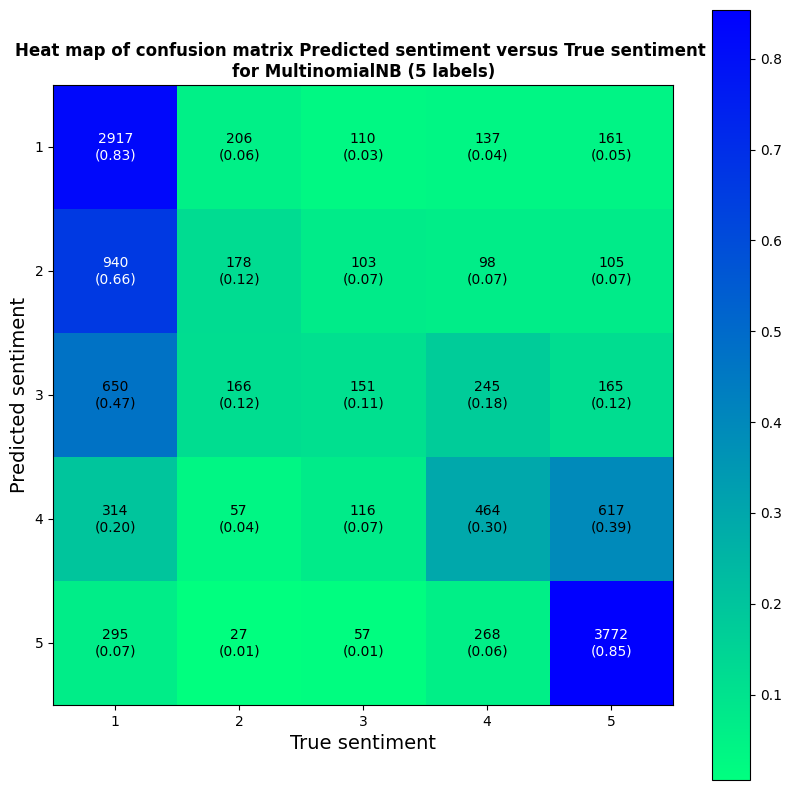

In [ ]:

# confusion matrix
s = "MultinomialNB (5 labels)"

cm = confusion_matrix ( y_test, y_pred )
print( "\nconfusion matrix:\n", cm )


#Heat-map of confusion matrix
def heatmap (cm, s):
  fig, ax = plot_confusion_matrix( conf_mat = cm, figsize = (10, 10), colorbar = True, show_absolute = True,
                                  show_normed = True, cmap = plt.cm.winter_r )

  plt.xlabel ("True sentiment", fontsize = 14)
  plt.ylabel ("Predicted sentiment", fontsize = 14)
  plt.title ("\nHeat map of confusion matrix Predicted sentiment versus True sentiment \nfor {}".format(s), fontweight = 'bold')

  ax.set_xticklabels((ax.get_xticks() +1).astype(int))
  ax.set_yticklabels((ax.get_yticks() +1).astype(int))

  plt.show ()

heatmap( cm, s )

### **Bar-graph 5 label MultinomialNB**


TRUE sentiments in text sample: [1 2 3 4 5]
                        Counts: [3531 1424 1377 1568 4419]


PREDICTED sentiments in text sample: [1 2 3 4 5]
                        Counts: [5116  634  537 1212 4820]



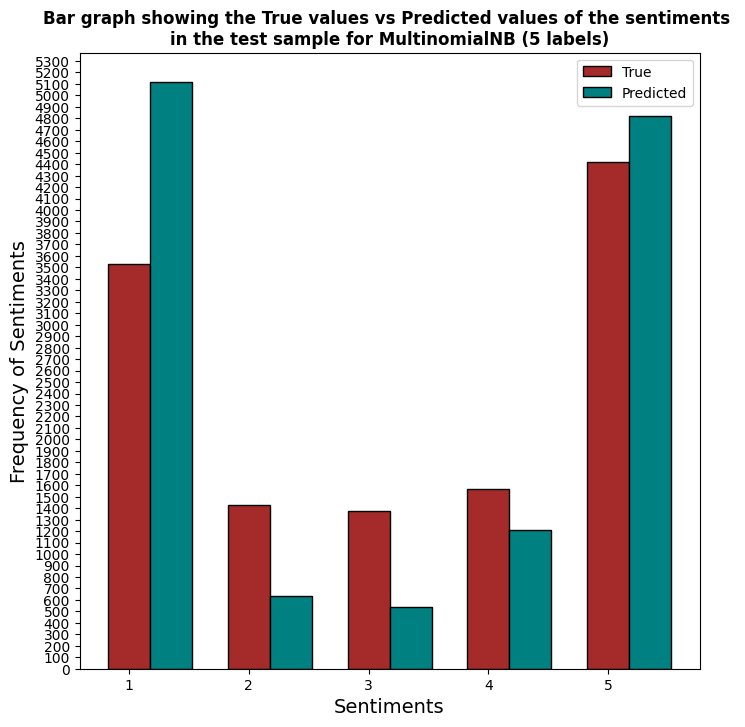

In [ ]:
# True test values
str = "TRUE"

def Value_counts(str, data):

    values, counts = np.unique(data, return_counts=True)
    print('\n{} sentiments in text sample: {}\n                        Counts: {}\n'.format(str, values, counts))

    return values, counts

true_val = Value_counts(str, y_test)


# Predicted test values
str2 = "PREDICTED"

pred_val = Value_counts(str2, y_pred)



# Plot Bar Graph of true test values vrs predicted values in graph
def plot_bar(values, counts, values2, counts2, s):

    fig, ax = plt.subplots(figsize =(8, 8))

    # set width of bar
    barWidth = 0.35

    # set height of bar
    Values = values
    Counts = counts
    Values2 = values2
    Counts2 = counts2

    # Set position of bar on X axis
    br2 = [ x + barWidth for x in Values2 ]

    plt.bar(Values, Counts, color='brown', edgecolor='black', width=barWidth, label='True')
    plt.bar(br2, Counts2, color='teal', edgecolor='black', width=barWidth, label='Predicted')

    plt.xlabel('Sentiments', fontsize=14)
    plt.ylabel('Frequency of Sentiments', fontsize=14)
    plt.title("Bar graph showing the True values vs Predicted values of the sentiments \nin the test sample for {}".format( s ),
              fontweight ='bold')

    labels = [1, 2, 3, 4, 5]

    plt.xticks(Values, labels)

    tick_spacing = 100
    ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

    plt.legend()
    plt.show()


plot_bar(true_val[0], true_val[1], pred_val[0], pred_val[1], s)


## **Class Weight Assignment with ComplementNB 5 labels**

In [ ]:

#Class weight assigning
from sklearn.naive_bayes import ComplementNB
from sklearn.utils import class_weight


weighted_model = ComplementNB()
class_weight = class_weight.compute_class_weight( class_weight = "balanced", classes = np.unique( y_train ), y = y_train )

print(y_train)

print( "\nThe class weights are: ", class_weight )

weighted_model.fit( cv_train_transformed, y_train, sample_weight=[class_weight[i] for i in (y_train - 1)] )

#Prediction after class weight assigning
weighted_pred = weighted_model.predict(cv_test_transformed)


score = accuracy_score (y_test, weighted_pred)

print ("\nComplementNB Naive Bayes prediction score for 5labels :", score)
print( f'Accuracy of the Model: { round( accuracy_score(y_test, weighted_pred) * 100, 2 ) }%' )
print( "\nclassification report:\n", classification_report(y_test, weighted_pred) )



9780     5
51477    5
550      5
42155    5
17895    2
        ..
34066    1
12296    1
13187    5
37787    2
45329    1
Name: Rating, Length: 49275, dtype: int64

The class weights are:  [0.69784733 1.73076923 1.78889091 1.57076825 0.55753564]

ComplementNB Naive Bayes prediction score for 5labels : 0.5532104878642747
Accuracy of the Model: 55.32%

classification report:
               precision    recall  f1-score   support

           1       0.67      0.52      0.58      3531
           2       0.25      0.37      0.30      1424
           3       0.26      0.17      0.20      1377
           4       0.32      0.39      0.35      1568
           5       0.77      0.82      0.80      4419

    accuracy                           0.55     12319
   macro avg       0.45      0.45      0.45     12319
weighted avg       0.57      0.55      0.55     12319



### **Confusion matrix & Heat-map 5 label after oversampling**

Confusion Matrix: 
 [[1830  423  248  105  138]
 [ 937  521  388  155   91]
 [ 273  174  233  147   84]
 [ 279  187  325  613  488]
 [ 212  119  183  548 3618]]


<ipython-input-146-ade662e5ff1a>:17: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-146-ade662e5ff1a>:18: UserWarning:

FixedFormatter should only be used together with FixedLocator



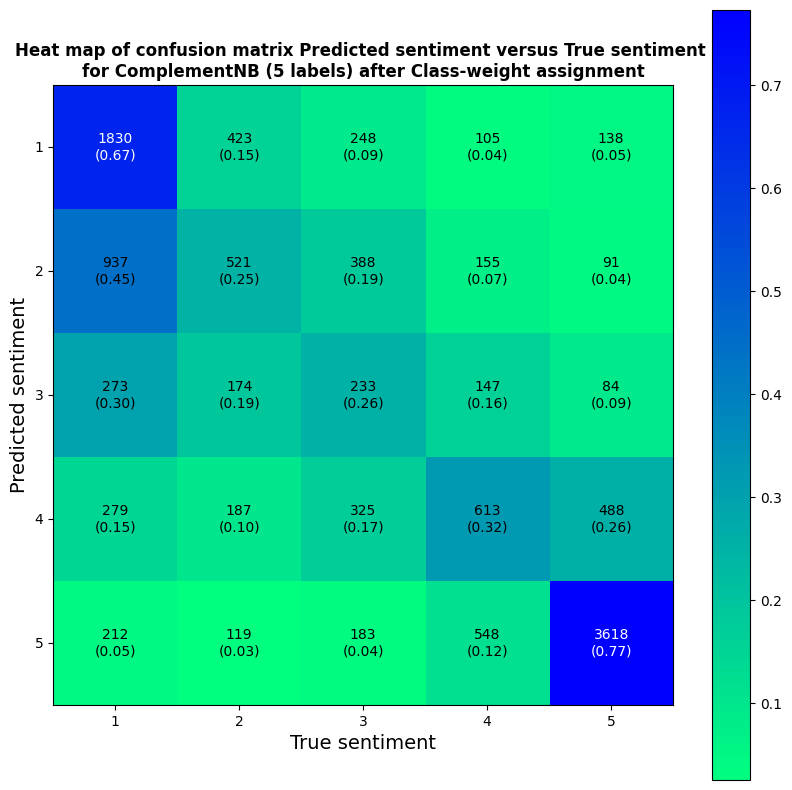

In [ ]:
# confusion matrix
s1 = "ComplementNB (5 labels) after Class-weight assignment"

cm = confusion_matrix ( weighted_pred, y_test)
print ('Confusion Matrix: \n', cm)

#plot heat-map for confusion matrix for Naive Bayes
heatmap( cm, s1 )


### **Bar-graph 5 label after oversampling**


Weighted TRUE sentiments in text sample: [1 2 3 4 5]
                        Counts: [3531 1424 1377 1568 4419]


Weighted PREDICTED sentiments in text sample: [1 2 3 4 5]
                        Counts: [2744 2092  911 1892 4680]



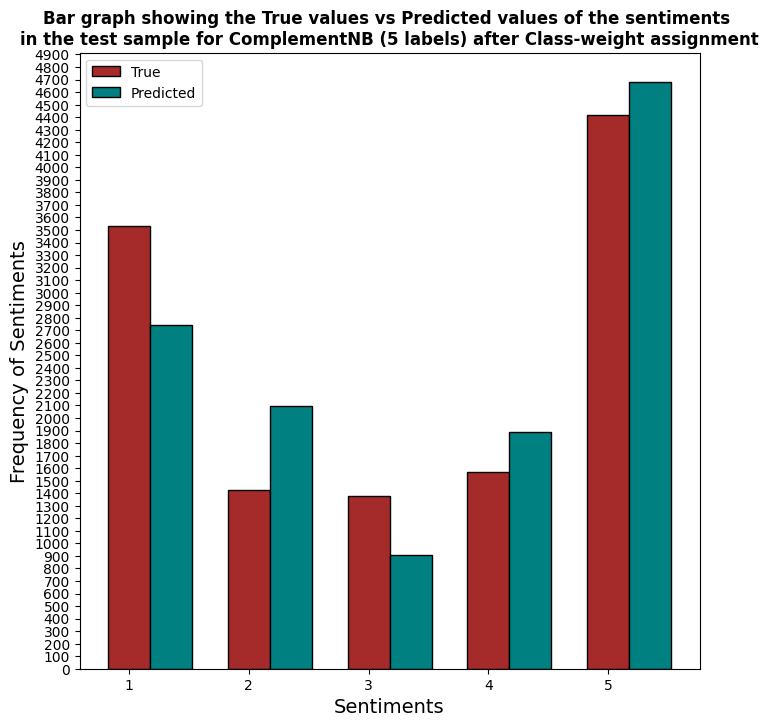

In [ ]:
#True Frequency of y_test for 3 labels
str = "Weighted TRUE"

true_val1 = Value_counts(str, y_test)

str2 = "Weighted PREDICTED"

#Predicted frequency of y_test
pred_val1 = Value_counts(str2, weighted_pred)


#Graph
plot_bar(true_val1[0], true_val1[1], pred_val1[0], pred_val1[1], s1)


# **For 3 labels classification of sentiments**







In [ ]:
label = {
    5: 3,
    4: 3,
    3: 2,
    2: 1,
    1: 1
}

df['sentiment_in_PosNegNeu'] = df['Rating'].apply(lambda x: label[x])
df.head(5)

,Time_submitted,Review,Rating,Total_thumbsup,Reply,length_of_text,ReviewContractions,ReviewTokenized,ReviewStop,ReviewLemmatized,ReviewFinal,sentiment_in_PosNegNeu
0,2022-07-09 15:00:00,"great music service, the audio is high quality...",5,2,NaN,21,"great music service, the audio is high quality...","[great, music, service, ,, the, audio, is, hig...","[great, music, service, audio, high, quality, ...","[great, music, service, audio, high, quality, ...",great music service audio high quality app eas...,3
1,2022-07-09 14:21:22,please ignore previous negative rating. this a...,5,1,NaN,15,please ignore previous negative rating. this a...,"[please, ignore, previous, negative, rating, ....","[please, ignore, previous, negative, rating, a...","[please, ignore, previous, negative, rat, app,...",please ignore previous negative rat app super ...,3
2,2022-07-09 13:27:32,"this pop-up ""get the best spotify experience o...",4,0,NaN,19,"this pop-up ""get the best spotify experience o...","[this, pop-up, ``, get, the, best, spotify, ex...","[popup, get, best, spotify, experience, androi...","[popup, get, best, spotify, experience, androi...",popup get best spotify experience android anno...,3
3,2022-07-09 13:26:45,really buggy and terrible to use as of recently,1,1,NaN,9,really buggy and terrible to use as of recently,"[really, buggy, and, terrible, to, use, as, of...","[really, buggy, terrible, use, recently]","[really, buggy, terrible, use, recently]",really buggy terrible use recently,1
4,2022-07-09 13:20:49,dear spotify why do i get songs that i didn't ...,1,1,NaN,21,dear spotify why do i get songs that i did not...,"[dear, spotify, why, do, i, get, songs, that, ...","[dear, spotify, get, songs, not, put, playlist...","[dear, spotify, get, songs, not, put, playlist...",dear spotify get songs not put playlist shuffl...,1


## **MultinimialNB classifier 3 label: fitting and prediction**

In [ ]:

x_train2, x_test2, y_train2, y_test2 = train_test_split (x, df ['sentiment_in_PosNegNeu'], random_state = 42,
                                                         test_size = 0.20, shuffle=True, stratify = df ['sentiment_in_PosNegNeu'])

cv_train_transformed = vectorizer.fit_transform(x_train2)
cv_test_transformed = vectorizer.transform(x_test2)


#Fitting new y_train with MultinominalNB() classifier
classifier.fit(cv_train_transformed, y_train2)
y_pred2 = classifier.predict(cv_test_transformed)


#new Prediction
accuracy(y_pred2, y_test2)


MultinomialNB Naive Bayes prediction score for 5labels : 0.7692182807046026
Accuracy of the Model: 76.92%

classification report:
               precision    recall  f1-score   support

           1       0.72      0.87      0.79      4954
           2       0.28      0.07      0.11      1377
           3       0.85      0.85      0.85      5988

    accuracy                           0.77     12319
   macro avg       0.62      0.60      0.58     12319
weighted avg       0.73      0.77      0.74     12319



### **Confusion matrix & Heat-map 3 label LR**

Confusion Matrix: 
 [[4319  888  789]
 [ 103   96  138]
 [ 532  393 5061]]


<ipython-input-146-ade662e5ff1a>:17: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-146-ade662e5ff1a>:18: UserWarning:

FixedFormatter should only be used together with FixedLocator



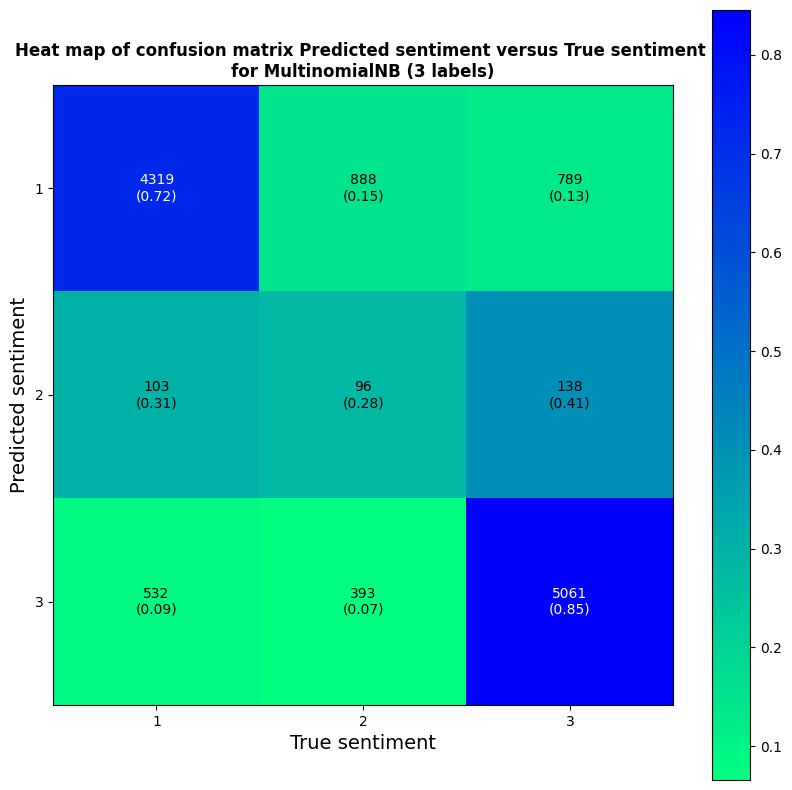

In [ ]:
# confusion matrix
s2 = "MultinomialNB (3 labels)"

cm2 = confusion_matrix ( y_pred2, y_test2 )
print ('Confusion Matrix: \n', cm2)

#plot heat-map for confusion matrix for Naive Bayes
heatmap( cm2, s2 )

### **Bar-graph 3 label LR**


Weighted TRUE sentiments in text sample: [1 2 3]
                        Counts: [4954 1377 5988]


Weighted PREDICTED sentiments in text sample: [1 2 3]
                        Counts: [5996  337 5986]



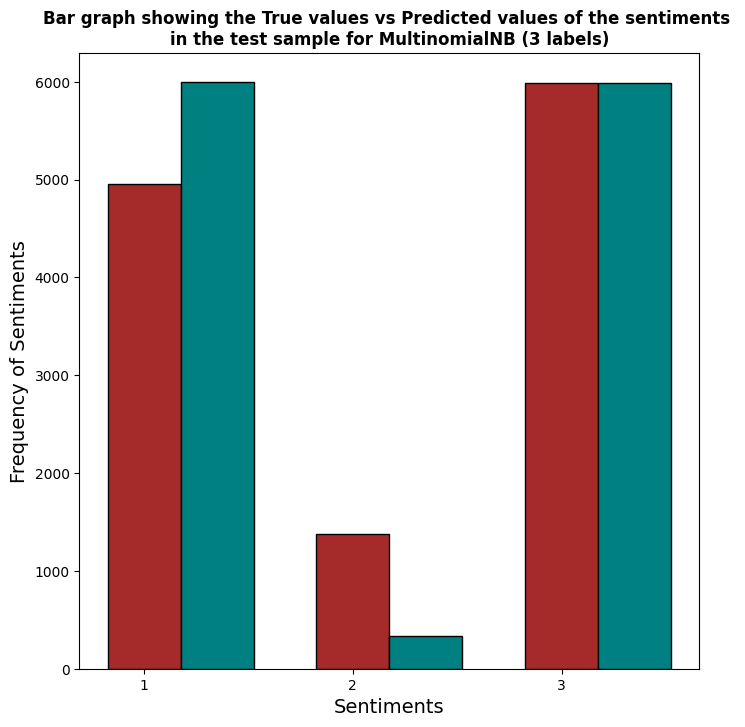

In [ ]:
# True Frequency of y_test for 3 labels
true_val2 = Value_counts(str, y_test2)

# Predicted frequency of y_test
pred_val2 = Value_counts(str2, y_pred2)

# Ensure consistency in unique values
unique_sentiments = np.unique(np.concatenate((true_val2[0], pred_val2[0])))

try:
    plot_bar(unique_sentiments, true_val2[1], unique_sentiments, pred_val2[1], s2)
except ValueError as e:
    pass  # Do nothing and continue execution

## **Class-Weight assignment complementNB 3 label**

In [ ]:
weighted_model = ComplementNB()

# print(y_train2)

# class_weight = class_weight.compute_class_weight( class_weight = "balanced", classes = np.unique( y_train2 ), y = y_train2 )

# weighted_model.fit( cv_train_transformed, y_train2, sample_weight=[class_weight[i] for i in (y_train2 - 1)] )

weighted_model.fit( cv_train_transformed, y_train2 )

#Prediction after class weight assigning
weighted_pred = weighted_model.predict(cv_test_transformed)

score = accuracy_score (y_test2, weighted_pred)

print ("\nComplementNB Naive Bayes prediction score for 5labels :", score)
print( f'Accuracy of the Model: { round( accuracy_score(y_test2, weighted_pred) * 100, 2 ) }%' )
print( "\nclassification report:\n", classification_report(y_test2, weighted_pred) )



ComplementNB Naive Bayes prediction score for 5labels : 0.7718158941472522
Accuracy of the Model: 77.18%

classification report:
               precision    recall  f1-score   support

           1       0.72      0.87      0.79      4954
           2       0.29      0.03      0.06      1377
           3       0.83      0.86      0.85      5988

    accuracy                           0.77     12319
   macro avg       0.62      0.59      0.57     12319
weighted avg       0.73      0.77      0.74     12319



### **Confusion matrix & Heat-map 3 label after oversampling**

Confusion Matrix: 
 [[4318  891  781]
 [  47   46   63]
 [ 589  440 5144]]


<ipython-input-146-ade662e5ff1a>:17: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-146-ade662e5ff1a>:18: UserWarning:

FixedFormatter should only be used together with FixedLocator



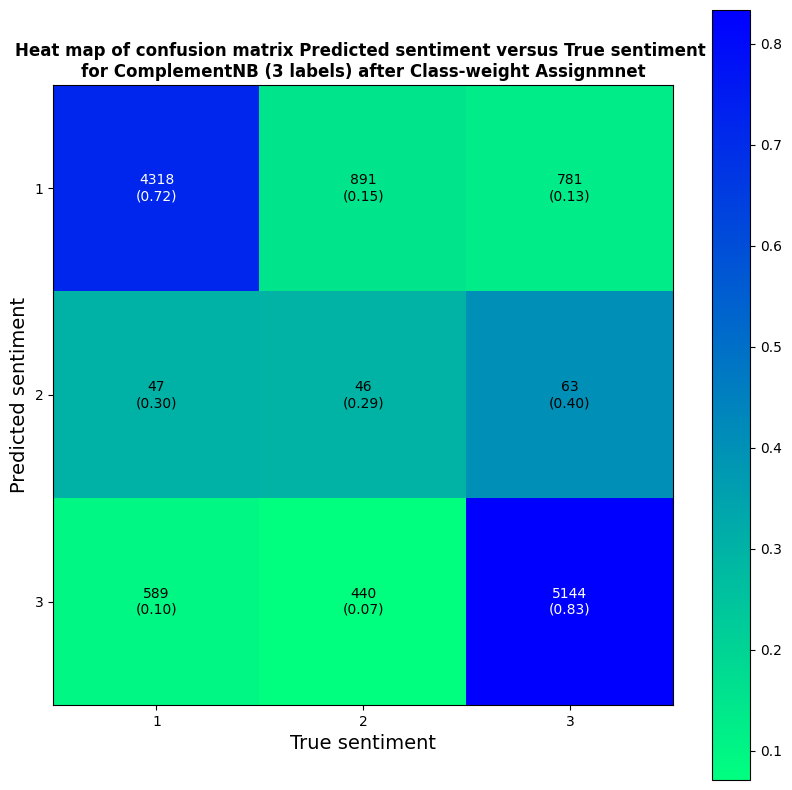

In [ ]:
# confusion matrix
s2 = "ComplementNB (3 labels) after Class-weight Assignmnet"

cm = confusion_matrix ( weighted_pred, y_test2)
print ('Confusion Matrix: \n', cm)

#plot heat-map for confusion matrix for Naive Bayes
heatmap( cm, s2 )


### **Bar-graph 3 label after oversampling**


Weighted TRUE sentiments in text sample: [1 2 3]
                        Counts: [4954 1377 5988]


Weighted PREDICTED sentiments in text sample: [1 2 3]
                        Counts: [5996  337 5986]



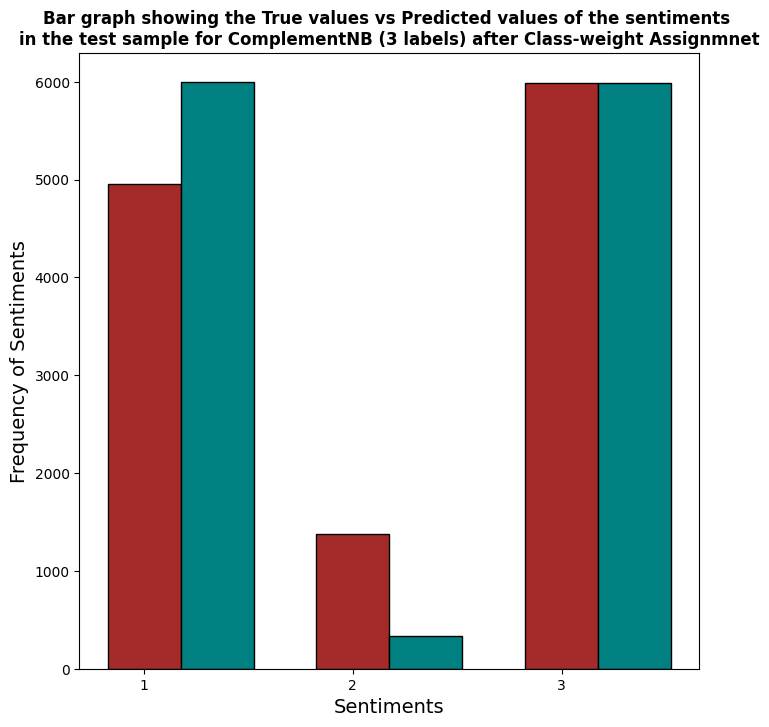

In [ ]:
# True Frequency of y_test for 3 labels
true_val3 = Value_counts(str, y_test2)

# Predicted frequency of y_test
pred_val3 = Value_counts(str2, y_pred2)

# Ensure consistency in unique values
unique_sentiments = np.unique(np.concatenate((true_val3[0], pred_val3[0])))

try:
    plot_bar(unique_sentiments, true_val3[1], unique_sentiments, pred_val3[1], s2)
except ValueError as e:
    pass  # Do nothing and continue execution

 **Download Pre-processed Data**

In [ ]:
import pandas as pd
import plotly.express as px

# Assuming FreqOfWords_top100 is your DataFrame with top 100 word frequencies

# Concatenate all the data to create the entire dataset
df_all = pd.concat([FreqOfWords_top100])

# Display the entire dataset
print(df_all)

# Save the entire DataFrame to CSV file
df_all.to_csv('preprocessed_dataset_all.csv', index=False)

     Word  Count
0      to  65159
1     the  64751
2       I  59824
3     and  45966
4      it  34108
..    ...    ...
95    new   3162
96     do   3135
97   best   3026
98     am   2956
99  still   2937

[100 rows x 2 columns]
